In [1]:
# importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataframe
data = pd.read_csv("Superstore.csv",encoding='latin-1')

In [4]:
# Displaying random records in a dataframe.
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8824,8825,CA-2017-117156,3/21/2017,3/23/2017,Second Class,TB-21055,Ted Butterfield,Consumer,United States,Reading,...,19601,East,OFF-EN-10003845,Office Supplies,Envelopes,Colored Envelopes,8.856,3,0.2,2.8782
3470,3471,US-2016-150035,12/1/2016,12/5/2016,Standard Class,CL-11890,Carl Ludwig,Consumer,United States,San Francisco,...,94122,West,FUR-FU-10003724,Furniture,Furnishings,Westinghouse Clip-On Gooseneck Lamps,16.740,2,0.0,4.3524
6849,6850,CA-2014-101462,4/20/2014,4/25/2014,Standard Class,BP-11230,Benjamin Patterson,Consumer,United States,Los Angeles,...,90045,West,FUR-FU-10000409,Furniture,Furnishings,"GE 4 Foot Flourescent Tube, 40 Watt",59.920,4,0.0,27.5632
1422,1423,CA-2015-124800,9/26/2015,9/30/2015,Standard Class,RW-19540,Rick Wilson,Corporate,United States,Mesa,...,85204,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',77.031,9,0.7,-59.0571
1084,1085,US-2016-143819,3/1/2016,3/5/2016,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,...,10701,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,362.920,2,0.0,105.2468


In [5]:
# shape of the dataframe
data.shape

(9994, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# Descriptive statistics for numerical coulumns.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,9994.0,NaN,NaN,NaN,4997.5,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,1237,9/5/2016,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9994,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Transforming orderdate & shipdate to datetime. After this creaing new columns which present their  month's & years respectively. 

In [9]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [10]:
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

In [11]:
data["order_month"] = pd.to_datetime(data["Order Date"]).dt.month_name()

In [12]:
data["order_year"] = pd.to_datetime(data["Order Date"]).dt.year

In [13]:
data["Ship_month"] = pd.to_datetime(data["Ship Date"]).dt.month_name()

In [14]:
data["Ship_year"] = pd.to_datetime(data["Ship Date"]).dt.year

In [15]:
data.sample(n=1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month,order_year,Ship_month,Ship_year
828,829,CA-2017-126956,2017-08-21,2017-08-28,Standard Class,GT-14710,Greg Tran,Consumer,United States,Lakeville,...,Envelopes,Security-Tint Envelopes,15.28,2,0.0,7.4872,August,2017,August,2017


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### Missing Value Treatment

In [17]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order_month      0
order_year       0
Ship_month       0
Ship_year        0
dtype: int64

##### No null values exist in the dataframe.

## Exploratoty Data Analysis

##### Sales Analysis

In [18]:
# Calculating Monthly Sales.
monthly_sales = data.groupby("order_month")["Sales"].sum().reset_index().sort_values(by='Sales',ascending=False)

In [19]:
monthly_sales

,order_month,Sales
9,November,352461.0710
2,December,325293.5035
11,September,307649.9457
7,March,205005.4888
10,October,200322.9847
1,August,159044.0630
8,May,155028.8117
6,June,152718.6793
5,July,147238.0970
0,April,137762.1286


<function matplotlib.pyplot.show(close=None, block=None)>

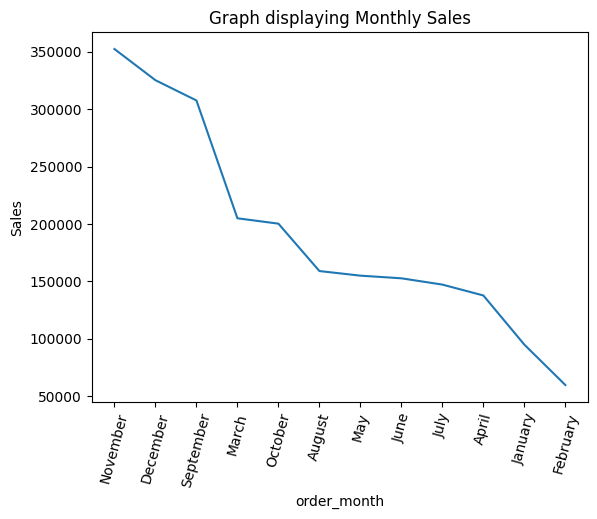

In [20]:
plt.title("Graph displaying Monthly Sales")
sns.lineplot(monthly_sales,x = "order_month",y="Sales")
plt.xticks(rotation = 75)
plt.show


In [21]:
# Sales on the basis of Category
category_sales = data.groupby('Category')["Sales"].sum()

In [22]:
category_sales

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x14c0a075250>,
 [Text(0.5806251240511282, 0.9342775098013503, 'Furniture'),
  Text(-1.0908936275896106, 0.14124833904998657, 'Office Supplies'),
  Text(0.4558499046992793, -1.0010998273826932, 'Technology')],
 [Text(0.31670461311879716, 0.5096059144371001, '32.3%'),
  Text(-0.5950328877761512, 0.07704454857271993, '31.3%'),
  Text(0.24864540256324322, -0.5460544512996508, '36.4%')])

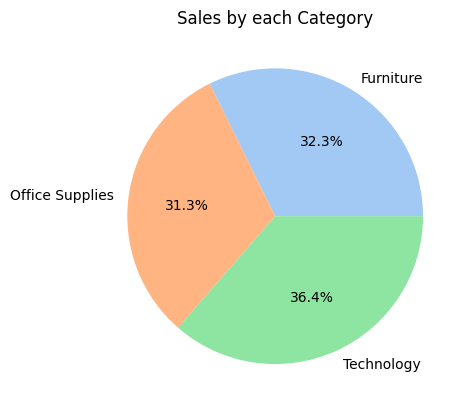

In [23]:
plt.title("Sales by each Category")
colors = sns.color_palette('pastel')[0:len(category_sales)]
plt.pie(category_sales,labels=category_sales.index, autopct='%1.1f%%',colors=colors)


In [24]:
#sales per Sub-Category
Sub_category_sales = data.groupby('Sub-Category')["Sales"].sum().reset_index()

In [25]:
Sub_category_sales

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

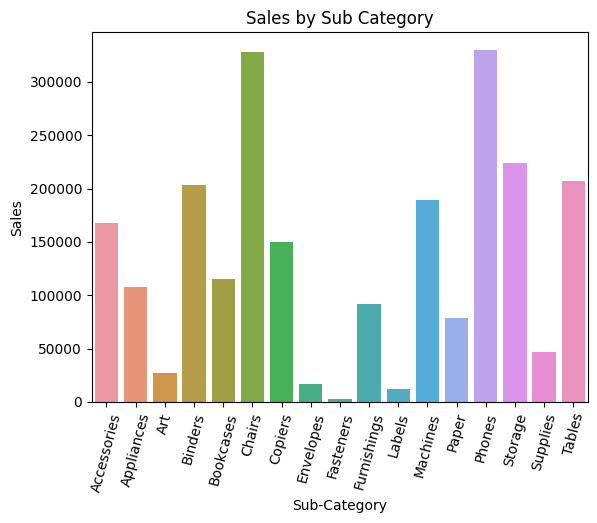

In [26]:
plt.title("Sales by Sub Category")
sns.barplot(Sub_category_sales,x = 'Sub-Category',y='Sales')
plt.xticks(rotation = 75)

##### Profit Analysis

In [27]:
# Profit's earned each month.
monthly_profit = data.groupby("order_month")["Profit"].sum().reset_index()

In [28]:
monthly_profit

,order_month,Profit
0,April,11587.4363
1,August,21776.9384
2,December,43369.1919
3,February,10294.6107
4,January,9134.4461
5,July,13832.6648
6,June,21285.7954
7,March,28594.6872
8,May,22411.3078
9,November,35468.4265


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

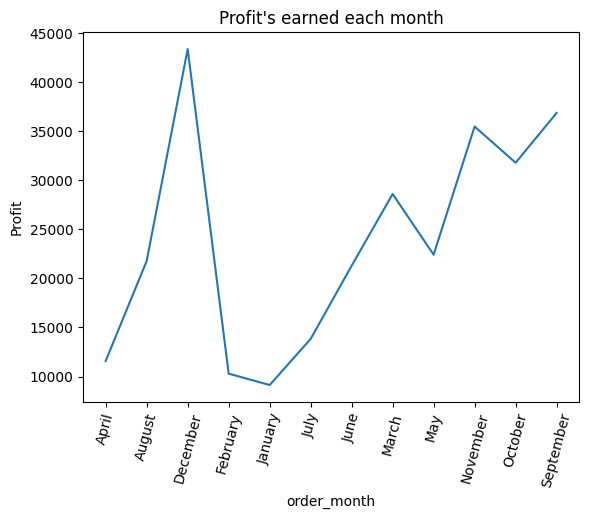

In [29]:
plt.title("Profit's earned each month")
sns.lineplot(monthly_profit,x="order_month",y = "Profit")
plt.xticks(rotation = 75)

In [30]:
# profit's earned per annum.
annual_profit = data.groupby("order_year")["Profit"].sum().reset_index()

<Axes: title={'center': 'Annual Profits'}, xlabel='order_year', ylabel='Profit'>

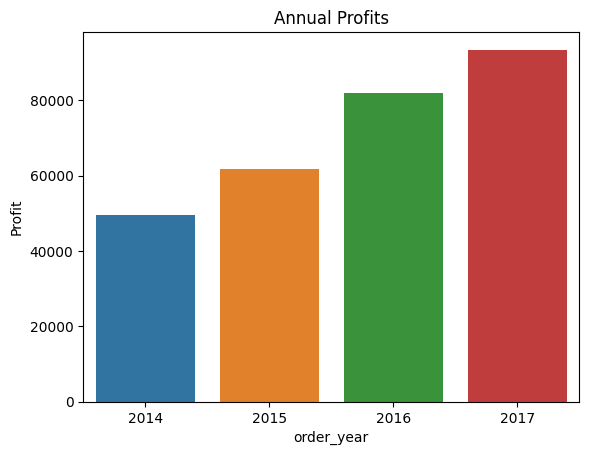

In [31]:
plt.title("Annual Profits")
sns.barplot(annual_profit,x = "order_year",y = "Profit")


In [32]:
#Profit's earned by each category.
category_profits = data.groupby("Category")["Profit"].sum()

([<matplotlib.patches.Wedge at 0x14c0c974390>,
 [Text(1.0775459327214676, 0.2211216020098955, 'Furniture'),
  Text(-0.19438549183984183, 1.0826884503688874, 'Office Supplies'),
  Text(-0.027224072906978994, -1.0996630619668717, 'Technology')],
 [Text(0.5877523269389823, 0.12061178291448844, '6.4%'),
  Text(-0.10602845009445917, 0.5905573365648477, '42.8%'),
  Text(-0.014849494312897631, -0.5998162156182936, '50.8%')])

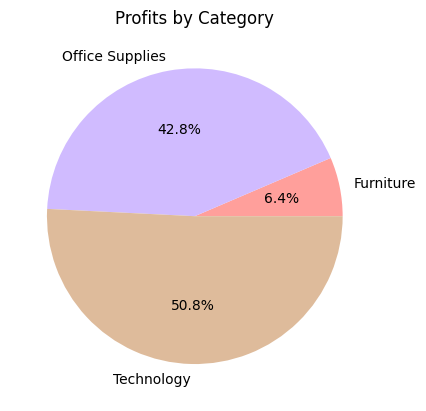

In [33]:
plt.title("Profits by Category")
colors = sns.color_palette('pastel')[3:7]
plt.pie(category_profits,labels=category_profits.index,autopct='%1.1f%%',colors=colors)

In [34]:
# Profit's earned by each sub category
sub_profit = data.groupby("Sub-Category")["Profit"].sum().reset_index()

In [35]:
sub_profit

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

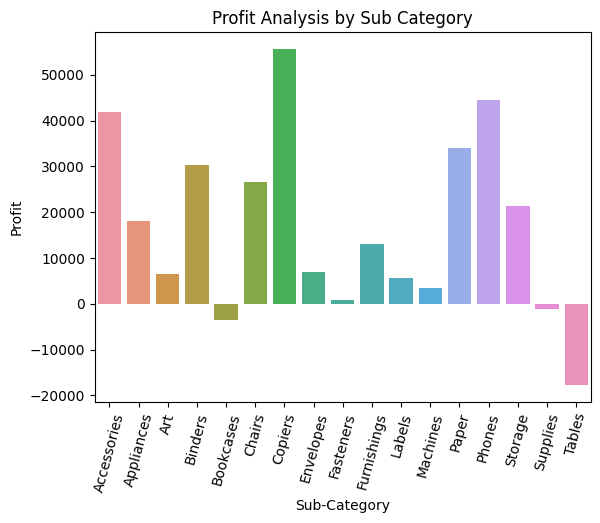

In [36]:
plt.title("Profit Analysis by Sub Category")
sns.barplot(sub_profit,x = "Sub-Category",y = "Profit")
plt.xticks(rotation = 75)

##### Sales-Profit Comparison w.r.t Segment

In [37]:
segment = data.groupby("Segment")[["Sales","Profit"]].sum()

In [38]:
segment

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


Text(0, 0.5, 'Sales,Profit')

<Figure size 1200x600 with 0 Axes>

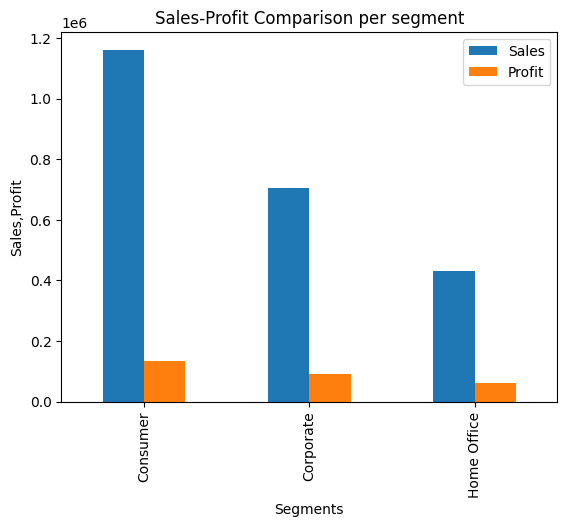

In [39]:
plt.figure(figsize=(12, 6))
segment.plot(kind='bar')
plt.title("Sales-Profit Comparison per segment")
plt.xlabel("Segments")
plt.ylabel("Sales,Profit")

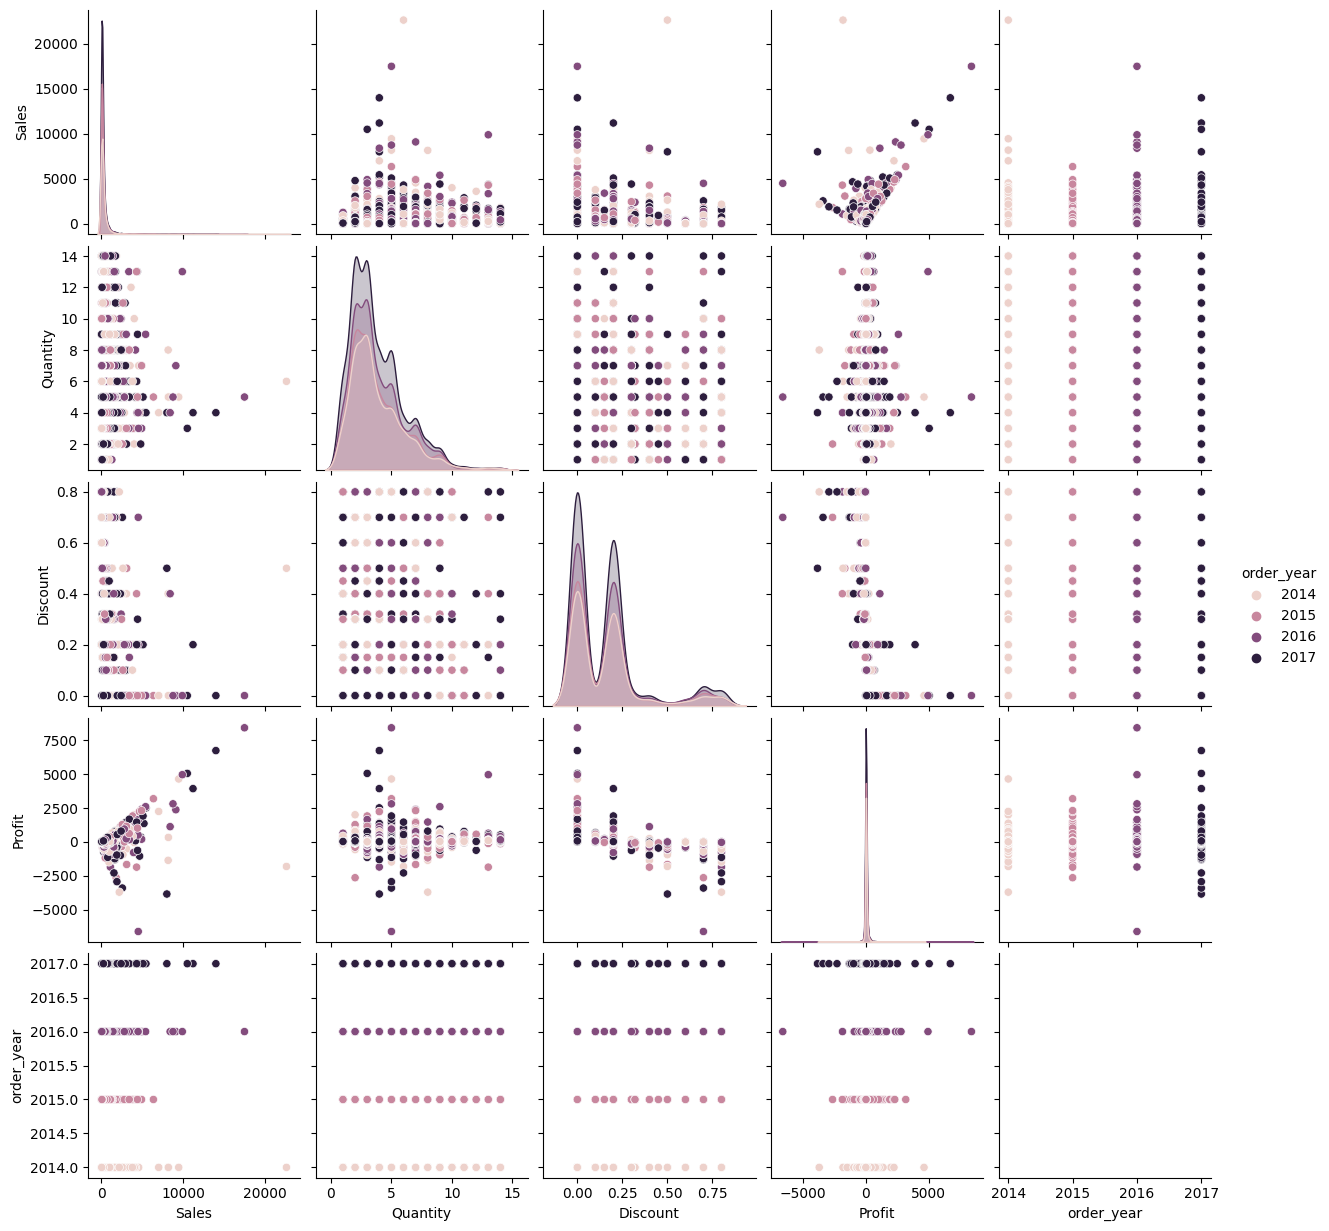

In [40]:
# Plotting a PairPlot
sns.pairplot(data,vars=['Sales', 'Quantity', 'Discount', 'Profit','order_year'], hue='order_year')

In [41]:
# Shape of the DataFrame
data.shape

(9994, 25)

In [42]:
# Clubbing all Numerical Columns
Num1 = data[['Row ID',  'Postal Code','Sales', 'Quantity', 'Discount', 'Profit', 'Ship_year']]

In [43]:
# Clubbing all Categorical Columns
Cat1 = data[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Region', 'Product ID', 'Category', 'Sub-Category', 'order_month',  'Ship_month',
       'Product Name', 
       'order_month']]

In [44]:
columns = data[['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

In [45]:
columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Row ID    9994 non-null   int64  
 1   Sales     9994 non-null   float64
 2   Quantity  9994 non-null   int64  
 3   Discount  9994 non-null   float64
 4   Profit    9994 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 390.5 KB


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [47]:
# Create a correlation matrix
corr_matrix = Num1.corr()

<Axes: >

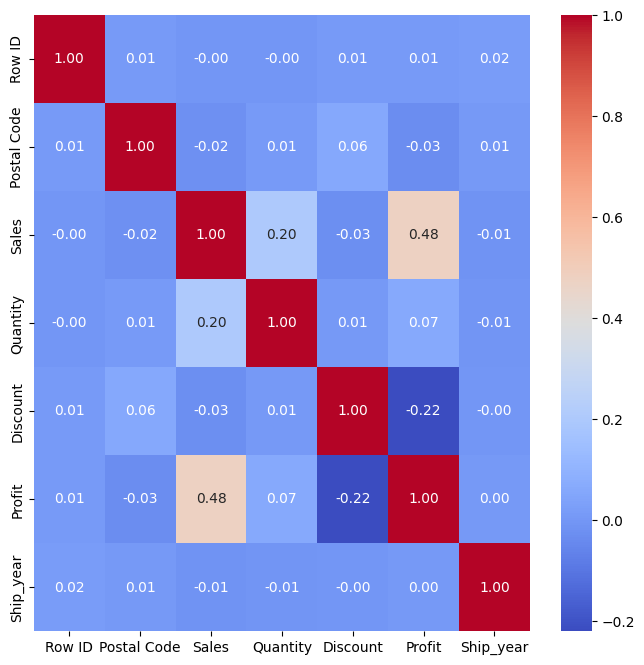

In [49]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

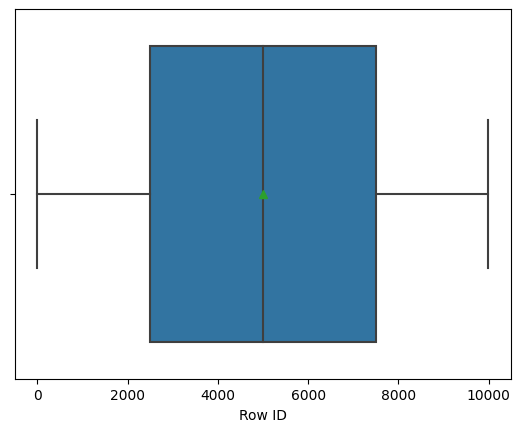

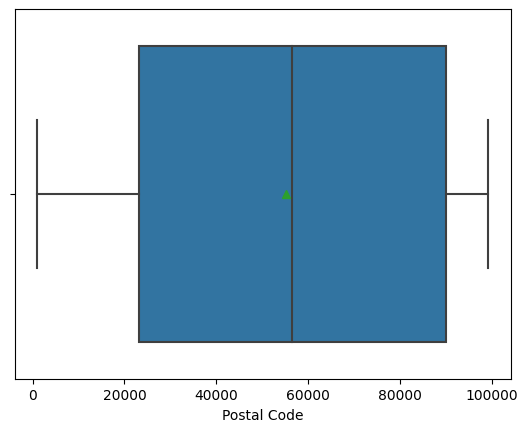

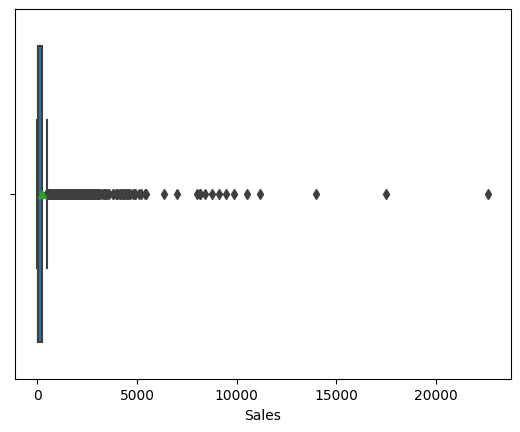

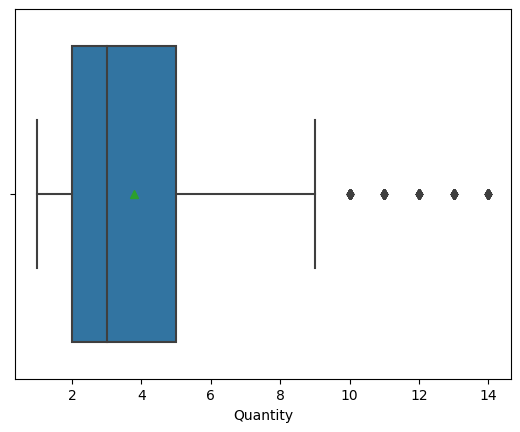

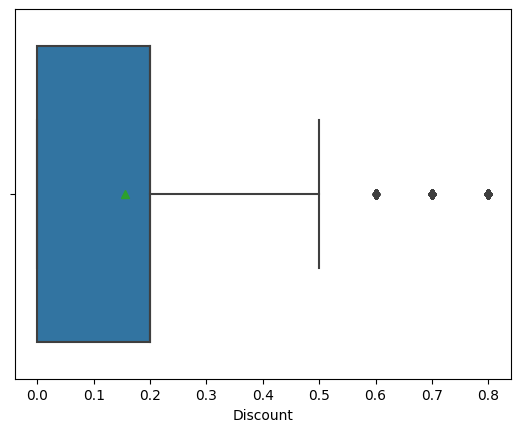

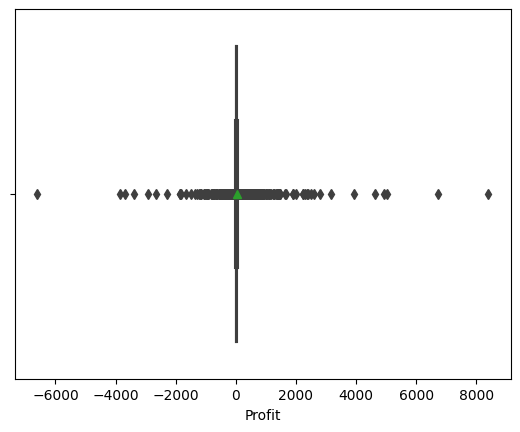

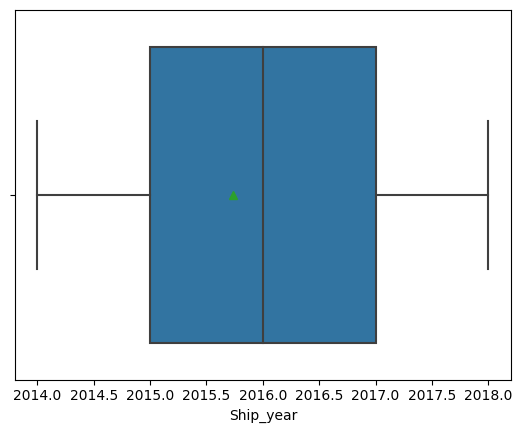

In [50]:
# Using Box-Plot to find outliers if any in the Numerical Columns
for col in Num1.columns:
    sns.boxplot(x = Num1[col],showmeans = True)
    
    
    
    plt.show()

In [51]:
# Using exponential method to reduce outliers
exp = data[[ 'Sales', 'Quantity', 'Discount', 'Profit']]

In [52]:
np.exp(exp["Sales"])

0       5.858447e+113
1                 inf
2        2.235555e+06
3                 inf
4        5.179633e+09
            ...      
9989     9.227139e+10
9990     8.664042e+39
9991    1.986689e+112
9992     7.163358e+12
9993    4.009094e+105
Name: Sales, Length: 9994, dtype: float64

In [53]:
# Using for-loop for reducing treatment
for i in exp.columns:
    exp[i] = np.exp(exp[i])

In [54]:
exp

,Sales,Quantity,Discount,Profit
0,5.858447e+113,7.389056,1.000000,1.595310e+18
1,inf,20.085537,1.000000,2.308080e+95
2,2.235555e+06,7.389056,1.000000,9.642976e+02
3,inf,148.413159,1.568312,4.484875e-167
4,5.179633e+09,7.389056,1.221403,1.238393e+01
...,...,...,...,...
9989,9.227139e+10,20.085537,1.221403,6.050948e+01
9990,8.664042e+39,7.389056,1.000000,6.157614e+06
9991,1.986689e+112,7.389056,1.221403,2.644598e+08
9992,7.163358e+12,54.598150,1.000000,6.092598e+05


In [55]:
# Replacing the values of Num1 dataframe with exponential values.
Num1[[ 'Sales', 'Quantity', 'Discount', 'Profit']] = exp[[ 'Sales', 'Quantity', 'Discount', 'Profit']]

In [56]:
Num1

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Ship_year
0,1,42420,5.858447e+113,7.389056,1.000000,1.595310e+18,2016
1,2,42420,inf,20.085537,1.000000,2.308080e+95,2016
2,3,90036,2.235555e+06,7.389056,1.000000,9.642976e+02,2016
3,4,33311,inf,148.413159,1.568312,4.484875e-167,2015
4,5,33311,5.179633e+09,7.389056,1.221403,1.238393e+01,2015
...,...,...,...,...,...,...,...
9989,9990,33180,9.227139e+10,20.085537,1.221403,6.050948e+01,2014
9990,9991,92627,8.664042e+39,7.389056,1.000000,6.157614e+06,2017
9991,9992,92627,1.986689e+112,7.389056,1.221403,2.644598e+08,2017
9992,9993,92627,7.163358e+12,54.598150,1.000000,6.092598e+05,2017


##### Creating New Dataframe Mod1 to build a linear_model

In [57]:
Mod1 = Num1

In [58]:
Cat1.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'order_month', 'Ship_month',
       'Product Name', 'order_month'],
      dtype='object')

In [59]:
Mod1["Region"] = Cat1["Region"]

In [60]:
mod1 = data[[ 'Ship Mode','Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', ]]

In [61]:
Mod1[['Sales', 'Quantity', 'Discount', 'Profit',"Ship_year"]] = Num1[['Sales', 'Quantity', 'Discount', 'Profit',"Ship_year"]]

In [62]:
Mod1[['Ship Mode', 
        'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category']] = Cat1[['Ship Mode', 
        'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category']] 

In [63]:
Mod1.sample(n = 5)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Ship_year,Region,Ship Mode,Segment,Country,City,State,Category,Sub-Category
3695,3696,22153,7.905964e+28,403.428793,1.000000,1.445433e+14,2016,South,Standard Class,Corporate,United States,Springfield,Virginia,Office Supplies,Envelopes
4863,4864,10011,4.453601e+21,20.085537,1.221403,2.025070e+07,2016,East,Standard Class,Corporate,United States,New York City,New York,Office Supplies,Binders
4069,4070,75081,5.088965e+05,8103.083928,2.225541,3.837614e-10,2016,Central,First Class,Consumer,United States,Dallas,Texas,Office Supplies,Binders
6692,6693,70601,2.398601e+207,59874.141715,1.000000,2.481880e+95,2017,South,Second Class,Home Office,United States,Lake Charles,Louisiana,Office Supplies,Binders
4857,4858,90004,5.026339e+33,54.598150,1.000000,3.262972e+16,2015,West,Standard Class,Consumer,United States,Los Angeles,California,Furniture,Furnishings


In [64]:
# All the Features to be used in the model.
Mod1.columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Ship_year', 'Region', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Category', 'Sub-Category'],
      dtype='object')

In [65]:
# Using Label Encoder to encode Columns
labelencoder = LabelEncoder()

In [66]:
for i in Mod1.columns:
    Mod1[i] = labelencoder.fit_transform(Mod1[i])

In [67]:
# Preparing X & y for model execution
# y contains Target Vatiable
y = Mod1["Profit"]


In [68]:
# X contains Independent Variables
X = Mod1.drop(columns='Profit')

In [69]:
X

,Row ID,Postal Code,Sales,Quantity,Discount,Ship_year,Region,Ship Mode,Segment,Country,City,State,Category,Sub-Category
0,0,217,4205,1,0,2,2,2,0,0,194,15,0,4
1,1,217,5193,2,0,2,2,2,0,0,194,15,0,5
2,2,517,969,1,0,2,3,2,1,0,266,3,1,10
3,3,170,5193,4,7,1,2,3,0,0,153,8,0,16
4,4,170,1360,1,3,1,2,3,0,0,153,8,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,169,1482,2,3,0,2,2,0,0,295,8,0,9
9990,9990,555,3029,1,0,3,3,3,0,0,104,3,0,9
9991,9991,555,4193,1,3,3,3,3,0,0,104,3,2,13
9992,9992,555,1644,3,0,3,3,3,0,0,104,3,1,12


In [70]:
# Dropping Country Column since the Data is of only united States
X.drop(columns='Country',inplace=True)

In [71]:
# Using Train-Test Split to split the data in training & testing halves.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

#### Implementing Different Machine Learning Algorithms to Predict the Profit in the most Accurate and Precise manner

###### 1. Linear Regression

In [72]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression

In [73]:
regression = LinearRegression()

In [74]:
regression.fit(X_train,y_train)

LinearRegression()

In [75]:
# Score of the Linear Model built
regression.score(X_test,y_test)

0.559563282168378

In [76]:
import sklearn.metrics as metrics

In [77]:
ypred = regression.predict(X_test)

In [78]:
r_squared = metrics.r2_score(y_test, ypred)

In [79]:
r_squared

0.559563282168378

##### 2.Lasso Regression

In [80]:
# importing Lasso Regression
from sklearn.linear_model import Lasso

In [81]:
lasso_reg = Lasso()

In [82]:
lasso_reg.fit(X_train,y_train)

Lasso()

In [83]:
# Lasso Model Accuracy
lasso_reg.score(X_test,y_test)

0.5595867666192589

##### 3. Ridge Regression

In [84]:
# importing Ridge Regression
from sklearn.linear_model import Ridge

In [85]:
ridge_reg = Ridge()

In [86]:
ridge_reg.fit(X_train,y_train)

Ridge()

In [87]:
# Accuracy of Ridge Regression Model
ridge_reg.score(X_test,y_test)

0.5595628484446578

###### 4. Random Forest

In [88]:
# importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [90]:
ypred = rf.score(X_test,y_test)

In [91]:
# Accuracy of Random Forest Regressor
ypred

0.8188652360929097

##### 5. K Nearest Neighbours

In [92]:
# importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor

In [93]:
knn_reg = KNeighborsRegressor()

In [94]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [95]:
# Accuracy of KNN Model
knn_reg.score(X_test,y_test)

0.1685698511512227